# About this notebook

Here, we will demonstrate how to use the code in TremaineWeinberg.py, using the strongly barred example shown in Géron et al. (2022). We will reproduce Figures 2, 3, 4 and 5 from the paper.

# Imports

In [1]:
import pandas as pd
from TremaineWeinberg import Tremaine_Weinberg
import numpy as np
import matplotlib.pyplot as plt
import time
from marvin.tools.maps import Maps

[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/geron/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/geron/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Defitions

In [2]:
def adjust_PAs(lst, source = 'NSA'):
    '''
    TODO: Change so that code needs angles East of North.
    
    PAs should be in deg!
    The NSA PAs are east of north. Ours are clockwise from 0 deg. NSA 0deg is actually 90deg for us
    Also make sure PAs are between 0 and 180
    '''
    
    if source == 'NSA':
        lst = 180 - np.array(lst) + 90
        
    for i in range(len(lst)):
        if lst[i] > 180:
            lst[i] = lst[i] - 180
        elif lst[i] < 0:
            lst[i] = lst[i] + 180
    
    return lst

# Code

TODO: Change this to nMC = 100

In [3]:
plateifu = '11956-12702'

maps = Maps(plateifu = plateifu, bintype='VOR10')

df_inputs = pd.read_csv('tables_geron2022/Table1.csv')
i = np.where(df_inputs['PLATEIFU'] == plateifu)[0][0]

inc = df_inputs['inc'][i]
inc_err = df_inputs['inc_err'][i]
PA = df_inputs['PA'][i]
PA_err = df_inputs['PA_err'][i]
L_bar = df_inputs['R_bar'][i] * 2 
L_bar_err = df_inputs['R_bar_err'][i] * 2
PA_bar = df_inputs['PA_bar'][i]
PA_bar_err = df_inputs['PA_bar_err'][i]

print(f'Galaxy plateifu: {plateifu}')
print(f'Inclination: {np.round(inc,2)}+-{np.round(inc_err,2)} deg')
print(f'Position angle: {np.round(PA,2)}+-{np.round(PA_err,2)} deg')
print(f'Bar length: {np.round(L_bar,2)}+-{np.round(L_bar_err,2)} arcsec')
print(f'Position angle of the bar: {np.round(PA_bar,2)}+-{np.round(PA_bar_err,2)} deg')

Galaxy plateifu: 11956-12702
Inclination: 60.81+-1.05 deg
Position angle: 34.8+-0.53 deg
Bar length: 26.93+-0.97 arcsec
Position angle of the bar: 14.44+-0.09 deg


In [4]:
start_time = time.time()

np.warnings.filterwarnings('ignore')

tw = Tremaine_Weinberg(PA, inc, L_bar, PA_bar, maps, PA_err = PA_err, inc_err = inc_err,
                       barlen_err = L_bar_err, PA_bar_err = PA_bar_err,
                      n_iter = 0)

print(f'{np.round(time.time() - start_time,2)} seconds elapsed.')

1.19.2
3.3.2
1.0
1.2.0
2.7.1
1.6.2
10.81 seconds elapsed.


In [16]:
import sys
 
print("User Current Version:-", sys.version)

User Current Version:- 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]


In [5]:
# You can look at the galaxy by doing (image is from SDSS, obtained through Marvin)
# tw.plot_img()

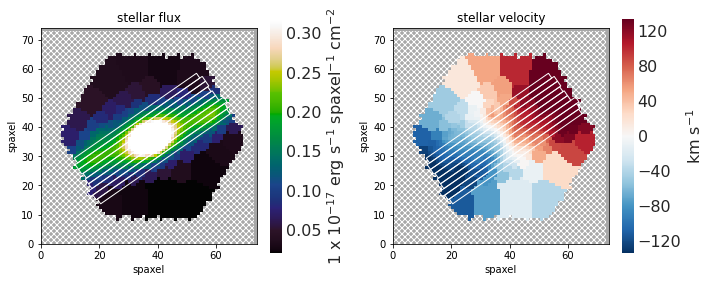

In [6]:
# You can plot various maps, similar to Figure 2 in Géron et al. (2022) by doing:
tw.plot_maps(plot_apers = True)

# The plot_apers parameter plots the apertures used on top of the maps.  

# By default it plots the stellar flux and stellar velocity. But you can also plot X_Sigma and V_Sigma.
# This can be done by doing:
# tw.plot_maps(maps = ['stellar_flux','stellar_vel','X_Sigma','V_Sigma'])


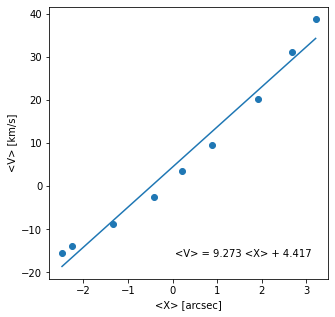

The NRMSE on this fit is: 0.0516


(9.272741665338028, 4.417194136075756)

In [7]:
# You can also check whether the different slits agree with each other, by inspecting the <X> vs <V> plot.
# This is similar to Figure 3 in Géron et al. (2022)

tw.plot_X_V()

# You can access the NRMSE on this fit by doing:
print(f'The NRMSE on this fit is: {np.round(tw.NRMSE_X_V,4)}')


tw.fitted_line[0][0], tw.fitted_line[0][1] #(9.272741665338028, 4.417194136075756)

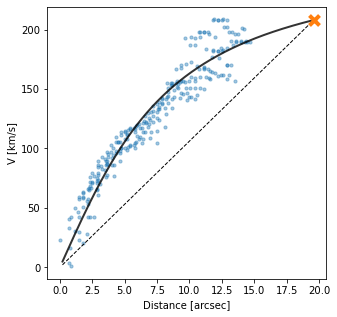

In [8]:
# One can also visualise how to corotation radius (Rcr) is obtained by plotting the velocity curve,
# which is similar to Figure 4 in Géron et al. (2022):

tw.plot_V_curve()

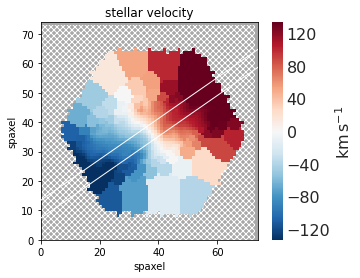

In [9]:
tw.plot_V_curve_contours()

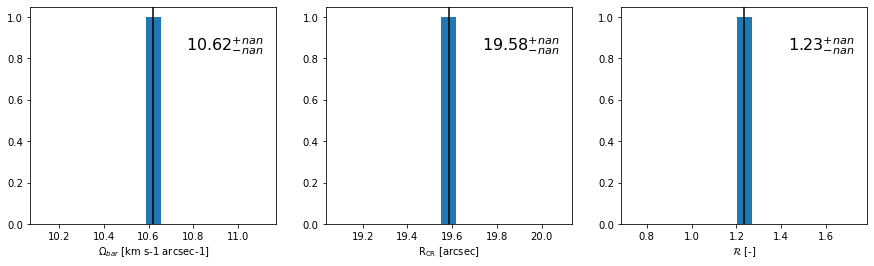

10.621144676630287 19.5842894621981 1.2345646283684089


In [10]:
# Finally, one can see the final histograms of the bar pattern speed, corotation radius and curly R,
# as shown in Figure 5 of Géron et al. (2022), by doing:

tw.plot_hist_MC(variables = ['Omega','R_corot','R'])

print(tw.Omega, tw.R_corot, tw.R) #10.621144676630287 19.5842894621981 1.2345646283684089

In [11]:
# You can directly access the bar pattern speed, corotation radius and curly R values like this:
Omega = tw.Omega
Rcr = tw.R_corot
R = tw.R

print(f'For target with plateifu {plateifu}, we obtain:')
print(f'Omega = {np.round(Omega,2)} km s-1 arcsec-1')
print(f'Rcr = {np.round(Rcr,2)} arcsec')
print(f'R = {np.round(R,2)}')

For target with plateifu 11956-12702, we obtain:
Omega = 10.62 km s-1 arcsec-1
Rcr = 19.58 arcsec
R = 1.23


In [12]:
# Compare with results from paper
df_results = pd.read_csv('tables_geron2022/Table3.csv')
i = np.where(df_results['PLATEIFU'] == plateifu)[0][0]

Omega_paper = df_results['Omega'][i]
Rcr_paper = df_results['Rcr'][i]
R_paper = df_results['R'][i]

print(Omega, Omega_paper,np.abs(Omega - Omega_paper))
print(Rcr, Rcr_paper,np.abs(Rcr - Rcr_paper))
print(R, R_paper,np.abs(R - R_paper))

10.621144676630287 10.708504869245246 0.08736019261495898
19.5842894621981 19.436476051867945 0.14781341033015494
1.2345646283684089 1.2232049088291914 0.011359719539217439


In [13]:
np.__version__

'1.19.2'

In [14]:
import matplotlib
matplotlib.__version__

'3.3.2'

In [15]:
math.__version__

NameError: name 'math' is not defined

In [ ]:
from importlib.metadata import version
version('np')

# Test with n_MC = 100 

TODO: remove this later

In [ ]:
start_time = time.time()

np.warnings.filterwarnings('ignore')

tw = Tremaine_Weinberg(PA, inc, L_bar, PA_bar, maps, 
                       PA_err = PA_err, inc_err = inc_err,
                       barlen_err = L_bar_err, PA_bar_err = PA_bar_err,
                      n_iter = 100, slit_length_method = 'default')

print(f'{np.round(time.time() - start_time,2)} seconds elapsed.')

In [ ]:
# You can also check whether the different slits agree with each other, by inspecting the <X> vs <V> plot.
# This is similar to Figure 3 in Géron et al. (2022)

tw.plot_X_V()

# You can access the NRMSE on this fit by doing:
print(f'The NRMSE on this fit is: {np.round(tw.NRMSE_X_V,4)}')

tw.fitted_line[0][0], tw.fitted_line[0][1] #(9.272741665338028, 4.417194136075756)

In [ ]:
# Finally, one can see the final histograms of the bar pattern speed, corotation radius and curly R,
# as shown in Figure 5 of Géron et al. (2022), by doing:

tw.plot_hist_MC(variables = ['Omega','R_corot','R'])

print(tw.Omega, tw.R_corot, tw.R) #10.629301347480865 19.572036451846635 1.2337942571390919

In [ ]:
# Compare with results from paper
df_results = pd.read_csv('tables_geron2022/Table3.csv')
i = np.where(df_results['PLATEIFU'] == plateifu)[0][0]

Omega_paper = df_results['Omega'][i]
Rcr_paper = df_results['Rcr'][i]
R_paper = df_results['R'][i]

print(Omega, Omega_paper,np.abs(Omega - Omega_paper))
print(Rcr, Rcr_paper,np.abs(Rcr - Rcr_paper))
print(R, R_paper,np.abs(R - R_paper))

In [ ]:
# In the end, make comparison to new version and my output in the csv files from the paper. Maybe in separate .gitignore notebook of whateever

In [ ]:
# TODO: Show version where NRMSE is too high, or not enough iterations successfull etc. 